In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
ashery_chexpert_path = kagglehub.dataset_download('ashery/chexpert')

print('Data source import complete.')


100%|██████████| 10.7G/10.7G [02:52<00:00, 66.7MB/s]

Extracting files...


Data source import complete.


In [ ]:
import pandas as pd
import torch
import numpy as np
import os
import PIL
import matplotlib.pyplot as plt
import cv2
from torchvision import transforms, models
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import timm

print(ashery_chexpert_path)

/root/.cache/kagglehub/datasets/ashery/chexpert/versions/1


In [ ]:
df = pd.read_csv(os.path.join(ashery_chexpert_path, 'valid.csv'))
# df.head()
df.fillna(0, inplace= True)
df.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/valid/patient64541/study1/...,Male,73,Frontal,AP,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CheXpert-v1.0-small/valid/patient64542/study1/...,Male,70,Frontal,PA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,CheXpert-v1.0-small/valid/patient64542/study1/...,Male,70,Lateral,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,CheXpert-v1.0-small/valid/patient64543/study1/...,Male,85,Frontal,AP,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CheXpert-v1.0-small/valid/patient64544/study1/...,Female,42,Frontal,AP,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
model = timm.create_model('resnet50', pretrained=True, num_classes=0)
checkpoint_dir = '/content/drive/MyDrive/model_checkpoints/model_epoch_10.pth'  # Change path as needed
num_labels = df[['No Finding', 'Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity', 'Lung Lesion',
                 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis', 'Pneumothorax', 'Pleural Effusion',
                 'Pleural Other', 'Fracture', 'Support Devices']].shape[1]
model = timm.create_model('resnet50', pretrained=True, num_classes=num_labels)
model.fc = nn.Linear(model.num_features, num_labels)

model.load_state_dict(torch.load(checkpoint_dir, map_location=torch.device('cpu')))
model.eval()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

<ipython-input-4-6304898c5360>:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(checkpoint_dir, map_location=torch.device('cpu')))


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act1): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (drop_block): Identity()
      (act2): ReLU(inplace=True)
      (aa): Identity()
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     

In [ ]:
df['Full_Path'] = df['Path'].apply(lambda x: os.path.join(ashery_chexpert_path, x))
df.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices,Full_Path
0,CheXpert-v1.0-small/valid/patient64541/study1/...,Male,73,Frontal,AP,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,/root/.cache/kagglehub/datasets/ashery/chexper...
1,CheXpert-v1.0-small/valid/patient64542/study1/...,Male,70,Frontal,PA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,/root/.cache/kagglehub/datasets/ashery/chexper...
2,CheXpert-v1.0-small/valid/patient64542/study1/...,Male,70,Lateral,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,/root/.cache/kagglehub/datasets/ashery/chexper...
3,CheXpert-v1.0-small/valid/patient64543/study1/...,Male,85,Frontal,AP,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,/root/.cache/kagglehub/datasets/ashery/chexper...
4,CheXpert-v1.0-small/valid/patient64544/study1/...,Female,42,Frontal,AP,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,/root/.cache/kagglehub/datasets/ashery/chexper...


In [ ]:
df['Full_Path'].iloc[0]

'/root/.cache/kagglehub/datasets/ashery/chexpert/versions/1/CheXpert-v1.0-small/valid/patient64541/study1/view1_frontal.jpg'

In [ ]:
df['Full_Path'] = df['Full_Path'].str.replace('CheXpert-v1.0-small/', '')
df.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices,Full_Path
0,CheXpert-v1.0-small/valid/patient64541/study1/...,Male,73,Frontal,AP,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,/root/.cache/kagglehub/datasets/ashery/chexper...
1,CheXpert-v1.0-small/valid/patient64542/study1/...,Male,70,Frontal,PA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,/root/.cache/kagglehub/datasets/ashery/chexper...
2,CheXpert-v1.0-small/valid/patient64542/study1/...,Male,70,Lateral,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,/root/.cache/kagglehub/datasets/ashery/chexper...
3,CheXpert-v1.0-small/valid/patient64543/study1/...,Male,85,Frontal,AP,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,/root/.cache/kagglehub/datasets/ashery/chexper...
4,CheXpert-v1.0-small/valid/patient64544/study1/...,Female,42,Frontal,AP,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,/root/.cache/kagglehub/datasets/ashery/chexper...


/root/.cache/kagglehub/datasets/ashery/chexpert/versions/1/valid/patient64541/study1/view1_frontal.jpg


AttributeError: 'ResNet' object has no attribute 'predict'

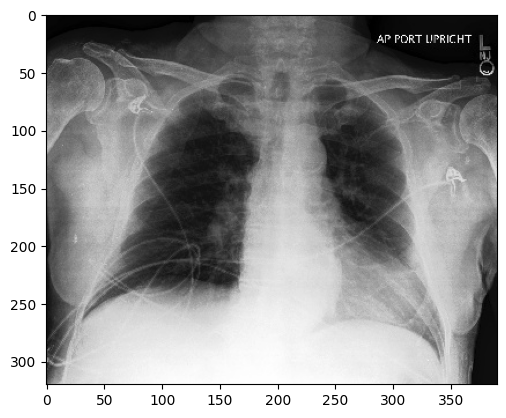

In [ ]:
from google.colab.patches import cv2_imshow
image_path = df['Full_Path'].iloc[0]
img = cv2.imread(image_path)
print(image_path)
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(image)
prediction = model.predict(image)
plt.show()

/root/.cache/kagglehub/datasets/ashery/chexpert/versions/1/valid/patient64541/study1/view1_frontal.jpg


<ipython-input-17-e8e92b3f773f>:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  logits = torch.tensor(prediction)


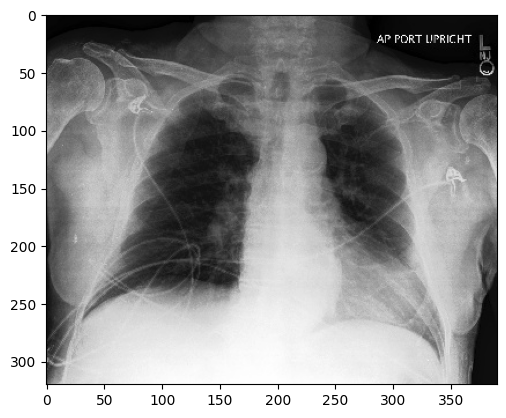

tensor([[7.2634e-03, 8.4640e-05, 5.2421e-05, 7.5837e-01, 1.7252e-04, 2.2904e-01,
         1.4780e-04, 1.5704e-03, 6.0250e-05, 1.3272e-04, 1.4543e-03, 3.1104e-05,
         4.0671e-04, 1.2099e-03]])
Path                          CheXpert-v1.0-small/valid/patient64541/study1/...
Sex                                                                        Male
Age                                                                          73
Frontal/Lateral                                                         Frontal
AP/PA                                                                        AP
No Finding                                                                  0.0
Enlarged Cardiomediastinum                                                  1.0
Cardiomegaly                                                                1.0
Lung Opacity                                                                1.0
Lung Lesion                                                                 0.0
Ede

In [ ]:
from google.colab.patches import cv2_imshow
import torch
import torchvision.transforms as transforms
from torch.nn.functional import softmax

image_path = df['Full_Path'].iloc[0]
img = cv2.imread(image_path)
print(image_path)
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(image)


# Preprocess the image
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert to PyTorch tensor
    transforms.Resize((224, 224)), # Resize to match model input size
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) # Normalize
])
image = transform(image)

# Add a batch dimension
image = image.unsqueeze(0)

# Move the image to the appropriate device (CPU in this case)
image = image.to(torch.device('cpu'))

# Make the prediction using model(image) for forward pass
with torch.no_grad():  # Disable gradient calculation during inference
    prediction = model(image)
    logits = torch.tensor(prediction)
    probs = softmax(logits, dim= 1)

plt.show()
print(probs) # Print the prediction for inspection
print(df.iloc[0]) # Print the corresponding row from the DataFrame

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Path                        234 non-null    object 
 1   Sex                         234 non-null    object 
 2   Age                         234 non-null    int64  
 3   Frontal/Lateral             234 non-null    object 
 4   AP/PA                       234 non-null    object 
 5   No Finding                  234 non-null    float64
 6   Enlarged Cardiomediastinum  234 non-null    float64
 7   Cardiomegaly                234 non-null    float64
 8   Lung Opacity                234 non-null    float64
 9   Lung Lesion                 234 non-null    float64
 10  Edema                       234 non-null    float64
 11  Consolidation               234 non-null    float64
 12  Pneumonia                   234 non-null    float64
 13  Atelectasis                 234 non

In [ ]:
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(234),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [ ]:
class TestingSet(Dataset):
  def __init__(self, df, transform= None):
    self.df = df.copy()
    self.transform = transform

  def __len__(self):
    return len(self.df)

  def __getitem__(self, idx):
    img_path = self.df['Full_Path'].iloc[idx]
    image = Image.open(img_path).convert('RGB')
    if self.transform:
      image = self.transform(image)
    label_columns = ['No Finding', 'Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity', 'Lung Lesion',
                 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis', 'Pneumothorax', 'Pleural Effusion',
                 'Pleural Other', 'Fracture', 'Support Devices']
    labels = self.df[label_columns].iloc[idx].values.astype(float)
    labels = torch.tensor(labels, dtype= torch.float32
                          )
    return image, labels

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

dataset = TestingSet(df, transform= preprocess)
dataloader = DataLoader(dataset, batch_size= 32, shuffle= True)
threshold = 0.5
all_labels = []
all_preds = []

with torch.no_grad():
    for images, labels in dataloader:
        #images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        probabilities = torch.sigmoid(outputs)  # Get probabilities by applying sigmoid
        preds = (probabilities > threshold).float()  # Apply threshold to get binary predictions

        all_labels.append(labels.cpu().numpy())
        all_preds.append(preds.cpu().numpy())

# Convert lists to arrays for metrics calculations
all_labels = np.concatenate(all_labels)
all_preds = np.concatenate(all_preds)


# Calculate accuracy
accuracy = accuracy_score(all_labels, all_preds)
precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='macro')


print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}')




Accuracy: 0.1282
Precision: 0.4630, Recall: 0.2294, F1-Score: 0.2693


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
